In [ ]:
#Import basic libraries
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import math
from copy import copy
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import time
import seaborn as sns


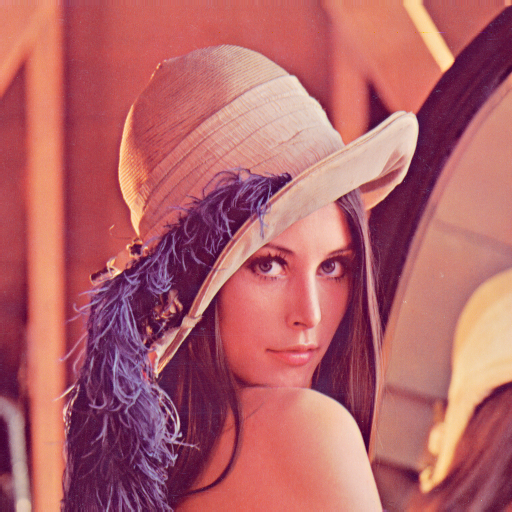

height, width: 512 512


In [ ]:
#load the test image
test_image = cv2.imread("Lenna_(test_image).png")

height = int(test_image.shape[0]*100/100)
width = int(test_image.shape[1]*100/100)

dsize = (width,height)
test_image = cv2.resize(test_image,dsize)
cv2_imshow(test_image)
print("height, width:",height,width)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


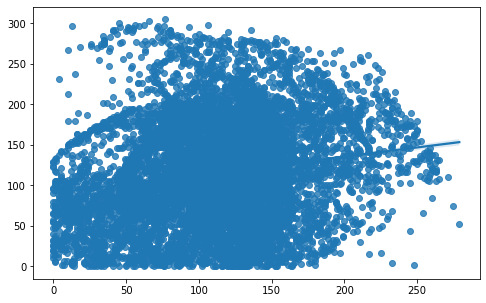

In [ ]:
#Generate the chaotic array

#start_key = time.time()
red = test_image[:,:,2]
green = test_image[:,:,1]
blue = test_image[:,:,0]
h,w = red.shape
dimension = h*w

######################## Generate chaotic array ##############################
################## Tinker bell ################
x_tinker=[0.1]
y_tinker=[0.3]
for i in range(0,dimension-1):
  next_x = (x_tinker[i]**2) - (y_tinker[i]**2) + 0.9*x_tinker[i] - 0.6013*y_tinker[i]
  next_y = 2*x_tinker[i]*y_tinker[i] + 2*x_tinker[i] + 0.5*y_tinker[i]
  x_tinker.append(next_x)
  y_tinker.append(next_y)

    
############### Duffing ########################
x_duff=[0.1]
y_duff=[0.3]
for i in range(0,dimension-1):
    next_x = y_duff[i]
    next_y = 2.75*y_duff[i] - 0.2*x_duff[i] - pow(y_duff[i],3)
    x_duff.append(next_x)
    y_duff.append(next_y)


#################### Combination of Tinkerbell and Duffing ######################

newmap_x_combination = []
newmap_y_combination = []
for i in range(0,dimension):
  
  newmap_x_combination.append(x_tinker[i] + x_duff[i])
  newmap_y_combination.append(y_tinker[i] + y_duff[i])


for i in range(0,dimension):
  newmap_x_combination[i]*=100
  newmap_y_combination[i]*=100
  if (newmap_x_combination[i]<0):
    newmap_x_combination[i] = -(newmap_x_combination[i])
  if (newmap_y_combination[i]<0):
    newmap_y_combination[i] = -(newmap_y_combination[i])
  newmap_x_combination[i] = int(newmap_x_combination[i])
  newmap_y_combination[i] = int(newmap_y_combination[i])

for i in range(0,dimension):
  if h<w:
    if newmap_x_combination[i]>=h:
      newmap_x_combination[i]%=h-1                    #divide by samller dimension
    
  elif h>w:
    if newmap_x_combination[i]>=w:
      newmap_x_combination[i]%=w-1
      
  elif h==w:
    if newmap_x_combination[i]>=h:
      newmap_x_combination[i]%=h-1                    #divide by samller dimension
      


for i in range(0,dimension):
  if h<w:
    if newmap_y_combination[i]>=h:
      newmap_y_combination[i]%=h-1
      
  elif h>w:
    if newmap_y_combination[i]>=w:
      newmap_y_combination[i]%=w-1

  elif h==w:
    if newmap_y_combination[i]>=w:
      newmap_y_combination[i]%=w-1

x = copy(newmap_x_combination)
y = copy(newmap_y_combination)

xor_array = []
for i in range(h*w):
  xor_array.append(x[i]*y[i])

for i in range(h*w):
  xor_array[i]%=256



f,ax = plt.subplots(figsize = (8,5))
sns.regplot(x[:10000],y[:10000])
plt.show()


In [ ]:
########################## Encryption begins ######################################

#Function for chaotic scrambling
def chaotic_scrambling(blue,green,red, xor_array, x, y):
 
  count = 0
  for i in range(0,h):
    for j in range(0,w):
      red[i][j] = red[i][j]^xor_array[count]
      green[i][j] = green[i][j]^xor_array[count]
      blue[i][j] = blue[i][j]^xor_array[count]
      count+=1

  chaotic_xor_image = cv2.merge((blue,green,red))  
  print("Image after xor operation")
  cv2_imshow(chaotic_xor_image)

  #Next function call
  chaotic_swapping(red, green, blue, xor_array, x, y)

  ################################# Chaotic scrambling ends ######################


#function for chaotic swaping
def chaotic_swapping(red,green,blue, xor_array, x, y):

  count = 0
  for i in range(0,h):
    for j in range(0,w):
      red[i][j], red[x[count]][y[count]] = red[x[count]][y[count]], red[i][j]
      green[i][j], green[x[count]][y[count]] = green[x[count]][y[count]], green[i][j]
      blue[i][j], blue[x[count]][y[count]] = blue[x[count]][y[count]], blue[i][j]
      count+=1

  image_to_zigzag = cv2.merge((blue,green,red))  
  print("\nImage after chaotic swapping:")
  cv2_imshow(image_to_zigzag)

  #Next function call
  zigzag_scrambling(red, green, blue, xor_array, x, y)

  
  ################################# Chaotic swapping ends ######################


# Functions for zigzag scrambling
def zigzag_scrambling(red, green, blue, xor_array, x, y):
  value = h+w-1
  overall_count = 0
  solution_array = [[],[],[]]
  
#for images whose height = width
  if h==w:
    while overall_count!=3:
      diag = 0
      i=0
      j=0
      flag = 0
      if overall_count == 0:
        channel = copy(red)
      elif overall_count == 1:
        channel = copy(green)
      elif overall_count == 2:
        channel = copy(blue)

      solution_array[overall_count].append(channel[i][j])
      while diag!=value-1:

        if i==0  and j!=w-1:
          j+=1
          solution_array[overall_count].append(channel[i][j])
          if i==0  and j==w-1:
            while i!=h-1:
              i+=1
              j-=1
              solution_array[overall_count].append(channel[i][j])
            flag = 1
          while j!=0 and flag ==0:
            i+=1
            j-=1
            solution_array[overall_count].append(channel[i][j])
          diag+=1
          
          
          
        if i!=0 and i!=h-1 and j==0:
          i+=1
          solution_array[overall_count].append(channel[i][j])
          while i!=0:
            i-=1
            j+=1
            solution_array[overall_count].append(channel[i][j])
          diag+=1


        if i!=0 and j==w-1:
          i+=1
          if i==h-1 and j==w-1:
            solution_array[overall_count].append(channel[i][j])
            break                                                   
          else:
            temp = i
            solution_array[overall_count].append(channel[i][j])
            while j!=temp:
              i+=1
              j-=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1

        if i!=0 and i==h-1 and j==0:
          j+=1
          temp = j
          solution_array[overall_count].append(channel[i][j])
          while i!=temp:
            i-=1
            j+=1
            solution_array[overall_count].append(channel[i][j])
          diag+=1
          

        
        if i==h-1 and j!=0:
          j+=1
          solution_array[overall_count].append(channel[i][j])
          if i==h-1 and j==w-1:
            break
            
          else:
            while j!=w-1:
              j+=1
              i-=1
              solution_array[overall_count].append(channel[i][j])
              diag+=1

        if i==h-1 and j==0:
          j+=1
          solution_array[overall_count].append(channel[i][j])
          while j!=w-1:
            j+=1
            i-=1
            solution_array[overall_count].append(channel[i][j])
          diag+=1
          

        if i==0 and j==w-1:                                                    
          i+=1
          solution_array[overall_count].append(channel[i][j])
          while i!=h-1:
            i+=1
            j-=1
            solution_array[overall_count].append(channel[i][j])
          diag+=1
      overall_count+=1

#for images whose height > width
  if h>w:
    while overall_count!=3:
      diag = 0
      i=0
      j=0
      flag = 0
      odd_flag=0
      even_flag=0
      left_flag=0
      if overall_count == 0:
        channel = copy(red)
      elif overall_count == 1:
        channel = copy(green)
      elif overall_count == 2:
        channel = copy(blue)

      solution_array[overall_count].append(channel[i][j])
      while diag!=value-1:
        if i==0 and j!=w-1:
          j+=1
          solution_array[overall_count].append(channel[i][j])
          if i==0 and j==w-1 and w%2==0:
            even_flag = 1
            while i!= w-1:
              i+=1
              j-=1
              solution_array[overall_count].append(channel[i][j])
          while (j!=0 and even_flag==0) or (j!=0 and odd_flag==0):
            i+=1
            j-=1
            solution_array[overall_count].append(channel[i][j])
          diag+=1
        
        if i!=0 and i!= h-1 and j==0:
          i+=1
          solution_array[overall_count].append(channel[i][j])
          if i==h-1 and even_flag ==1:
            left_flag=1
  
            while j!=w-1:
              j+=1
              i-=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1
          
          elif i==h-1 and odd_flag==1:
            left_flag=1
            while j!=w-1:
              i-=1
              j+=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1

          elif even_flag==1 or odd_flag==1:
            while j!=w-1:
              i-=1
              j+=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1

          else:
            temp = copy(i)
            while j!=temp:
              i-=1
              j+=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1
        

        if i!=0 and j==w-1:
          i+=1
          solution_array[overall_count].append(channel[i][j])
          if i==h-1 and j==w-1:
              
            break
          elif left_flag==1:
            while i!=h-1:
              i+=1
              j-=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1
          else:
            while j!=0:           
              i+=1
              j-=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1

        if i==h-1 and j!=w-1:
          if i==h-1 and j==0:
            left_flag=1
          j+=1
          solution_array[overall_count].append(channel[i][j])
          if i==h-1 and j==w-1:
            break
          else:
            while j!=w-1:
              i-=1
              j+=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1

        if i==0 and j==w-1 and (w%2)!=0:
          i+=1
          solution_array[overall_count].append(channel[i][j])
          odd_flag=1
          while j!=0:
            j-=1
            i+=1
            solution_array[overall_count].append(channel[i][j])
          diag+=1

      overall_count+=1

#for images whose height < width
  if h<w:
    while overall_count!=3:
      diag = 0
      i=0
      j=0
      flag = 0
      odd_flag=0
      even_flag=0
      right_diag=0
      if overall_count == 0:
        channel = copy(red)
      elif overall_count == 1:
        channel = copy(green)
      elif overall_count == 2:
        channel = copy(blue)
      solution_array[overall_count].append(channel[i][j])

      while diag!=value-1:
        if i==0 and j!=w-1:
          j+=1
          solution_array[overall_count].append(channel[i][j])
          if j==h-1:
            while i!=h-1:
              i+=1
              j-=1
              solution_array[overall_count].append(channel[i][j])
            even_flag=1
            diag+=1

          elif j==w-1:
            if even_flag == 1 and w%2==0:
              while i!=h-1:
                i+=1
                j-=1
                solution_array[overall_count].append(channel[i][j])
              diag+=1
              right_diag = 1
                

            elif odd_flag==1 and w%2==0:
              while i!=h-1:
                i+=1
                j-=1
                solution_array[overall_count].append(channel[i][j])
              diag+=1
              right_diag=1
            elif odd_flag==1 and w%2!=0:
              i+=1
              while i!=h-1:
                i+=1
                j-=1
                solution_array[overall_count].append(channel[i][j])
              diag+=1
              right_diag = 1

          
          elif even_flag==0 and odd_flag==0:
            while j!=0:
              j-=1
              i+=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1
          
          elif even_flag==1 or odd_flag==1:
            while  i!=h-1:
              i+=1
              j-=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1

        
        if i!=0 and i!=h-1 and j==0:
          i+=1
          solution_array[overall_count].append(channel[i][j])
          if i==h-1:
            temp=copy(i)
            odd_flag=1 
            while j!=temp:
              j+=1
              i-=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1
          else:
            temp=copy(i)
            while j!=temp:
              j+=1
              i-=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1
          
        if i==0 and j==w-1:
          i+=1
          solution_array[overall_count].append(channel[i][j])
          while i!=h-1:
            i+=1 
            j-=1 
            solution_array[overall_count].append(channel[i][j])
          diag+=1
          
          
        
        if i==h-1 and j!=w-1:
          j+=1
          solution_array[overall_count].append(channel[i][j])
          if j==w-1:
            break
          elif right_diag==0:
            while i!=0:
              i-=1
              j+=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1
            if j==w-1:
              right_diag=1
          elif right_diag==1:
            while j!=w-1:
              j+=1
              i-=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1


        
        if i!=0 and i!=h-1 and j==w-1:
          i+=1
          solution_array[overall_count].append(channel[i][j])
          if i==h-1 and j==w-1:
            break
          else:
            while i!=h-1:
              i+=1
              j-=1
              solution_array[overall_count].append(channel[i][j])
            diag+=1

      overall_count+=1

###########################zigzag matrix formation #############################
  encrypted_red = []
  encrypted_green = []
  encrypted_blue = []
  for i in range(0,h):
    row = []
    for j in range(0,w):
      row.append(0)
    encrypted_red.append(row)
    encrypted_green.append(row)
    encrypted_blue.append(row)
  
  encrypted_red = np.array(encrypted_red)
  encrypted_green = np.array(encrypted_green)
  encrypted_blue = np.array(encrypted_blue)

  channel_count = 0
  for i in range(0, h):
      for j in range(0, w):
          encrypted_red[i][j] = solution_array[0][channel_count]   #red
          encrypted_green[i][j] = solution_array[1][channel_count] #green
          encrypted_blue[i][j] = solution_array[2][channel_count]  #blue
          channel_count += 1

######################## Encryption ends #######################################


  ############# Function call ############################
  
  combined_scrambling = cv2.merge((encrypted_blue,encrypted_green,encrypted_red))
  
  print("\nEncrypted image")
  cv2_imshow(combined_scrambling)

  #Next function call
  zigzag_descrambling(combined_scrambling, xor_array, x, y)

     






In [ ]:
############################## Decryption  begins #######################

#function for zigzag descrambling
def zigzag_descrambling(combined_scrambling, xor_array, x, y):

  received_blue,received_green,received_red = cv2.split(combined_scrambling)
  
  red_traversal_array = []
  for i in range(0,h):
    for j in range(0,w):
      red_traversal_array.append(received_red[i][j])

  green_traversal_array = []
  for i in range(0,h):
    for j in range(0,w):
      green_traversal_array.append(received_green[i][j])

  blue_traversal_array = []
  for i in range(0,h):
    for j in range(0,w):
      blue_traversal_array.append(received_blue[i][j])

  matrix = []
  for i in range(0,h):
    row=[]
    for j in range(0,w):
      row.append(0)
    matrix.append(row)
  
  zero_array = np.array(matrix)



  overall_count = 0
  value = h+w-1

  #for images whose height = width
  if h==w:
    while overall_count !=3:
      diag = 0
      i=0
      j=0
      flag = 0
      count = 0
      if overall_count == 0:
        traversal_array = red_traversal_array
        decrypted_array = copy(zero_array)
        decrypted_array[i][j] = traversal_array[count]

      if overall_count == 1:
        traversal_array = green_traversal_array
        decrypted_array = copy(zero_array)
        decrypted_array[i][j] = traversal_array[count]

      if overall_count == 2:
        traversal_array = blue_traversal_array
        decrypted_array = copy(zero_array)
        decrypted_array[i][j] = traversal_array[count]

      count+=1
      while diag!=value-1:

        if i==0  and j!=w-1:
          j+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if i==0  and j==w-1:
            while i!=h-1:
              i+=1
              j-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            flag = 1
          while j!=0 and flag ==0:
            i+=1
            j-=1
            decrypted_array[i][j] = traversal_array[count]
            count+=1
          diag+=1
          
          
          
        if i!=0 and i!=h-1 and j==0:
          i+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          while i!=0:
            i-=1
            j+=1
            decrypted_array[i][j] = traversal_array[count]
            count+=1
          diag+=1


        if i!=0 and j==w-1:
          i+=1
          temp = i
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          while j!=temp:
            i+=1
            j-=1
            decrypted_array[i][j] = traversal_array[count]
            count+=1
          diag+=1

        if i!=0 and i==h-1 and j==0:
          j+=1
          temp = j
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          while i!=temp:
            i-=1
            j+=1
            decrypted_array[i][j] = traversal_array[count]
            count+=1
          diag+=1
          

        
        if i==h-1 and j!=0:
          j+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if i==h-1 and j==w-1:
            break
            
          else:
            while j!=w-1:
              j+=1
              i-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
              diag+=1

        if i==h-1 and j==0:
          j+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          while j!=w-1:
            j+=1
            i-=1
            decrypted_array[i][j] = traversal_array[count]
            count+=1
          diag+=1

      if overall_count == 0:
        red_decrypted_array = copy(decrypted_array)

      elif overall_count == 1:
        green_decrypted_array = copy(decrypted_array)

      elif overall_count == 2:
        blue_decrypted_array = copy(decrypted_array)


      overall_count+=1

#for images whose height > width
  elif h>w:
    while overall_count!=3:
      diag = 0
      i=0
      j=0
      flag = 0
      odd_flag=0
      even_flag=0
      left_flag=0
      count = 0

      if overall_count == 0:
        traversal_array = red_traversal_array
        decrypted_array = copy(zero_array)
        decrypted_array[i][j] = traversal_array[count]

      if overall_count == 1:
        traversal_array = green_traversal_array
        decrypted_array = copy(zero_array)
        decrypted_array[i][j] = traversal_array[count]

      if overall_count == 2:
        traversal_array = blue_traversal_array
        decrypted_array = copy(zero_array)
        decrypted_array[i][j] = traversal_array[count]

      
      count+=1
      
      while diag!=value-1:
        if i==0 and j!=w-1:
          j+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if i==0 and j==w-1 and w%2==0:
            even_flag = 1
            while i!= w-1:
              i+=1
              j-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
          while (j!=0 and even_flag==0) or (j!=0 and odd_flag==0):
            i+=1
            j-=1
            decrypted_array[i][j] = traversal_array[count]
            count+=1
          diag+=1
        
        if i!=0 and i!= h-1 and j==0:
          i+=1
         
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if i==h-1 and even_flag ==1:
            left_flag=1
           
            while j!=w-1:
              j+=1
              i-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1
          
          elif i==h-1 and odd_flag==1:
            left_flag=1
            while j!=w-1:
              i-=1
              j+=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1

          elif even_flag==1 or odd_flag==1:
            while j!=w-1:
              i-=1
              j+=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1

          else:
            temp = copy(i)
            while j!=temp:
              i-=1
              j+=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1
        

        if i!=0 and j==w-1:
          i+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if i==h-1 and j==w-1:
            diag+=1  
            break
          elif left_flag==1:
            while i!=h-1:
              i+=1
              j-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1
          else:
            while j!=0:           
              i+=1
              j-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1

        if i==h-1 and j!=w-1:
          if i==h-1 and j==0:
            left_flag=1
          j+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if i==h-1 and j==w-1:
            break
          else:
            while j!=w-1:
              i-=1
              j+=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1

        if i==0 and j==w-1 and (w%2)!=0:
          i+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          odd_flag=1
          while j!=0:
            j-=1
            i+=1
            decrypted_array[i][j] = traversal_array[count]
            count+=1
          diag+=1

        
      if overall_count == 0:
        red_decrypted_array = copy(decrypted_array)

      elif overall_count == 1:
        green_decrypted_array = copy(decrypted_array)

      elif overall_count == 2:
        blue_decrypted_array = copy(decrypted_array)
      overall_count+=1

#for images whose height < width
  elif h<w:
    while overall_count!=3:
      diag = 0
      i=0
      j=0
      flag = 0
      odd_flag=0
      even_flag=0
      right_diag=0
      count = 0

      if overall_count == 0:
        traversal_array = red_traversal_array
        decrypted_array = copy(zero_array)
        decrypted_array[i][j] = traversal_array[count]

      if overall_count == 1:
        traversal_array = green_traversal_array
        decrypted_array = copy(zero_array)
        decrypted_array[i][j] = traversal_array[count]

      if overall_count == 2:
        traversal_array = blue_traversal_array
        decrypted_array = copy(zero_array)
        decrypted_array[i][j] = traversal_array[count]

      
      count+=1
      while diag!=value-1:
        if i==0 and j!=w-1:
          j+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if j==h-1:
            while i!=h-1:
              i+=1
              j-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            even_flag=1
            diag+=1

          elif j==w-1:
            if even_flag == 1 and w%2==0:
              while i!=h-1:
                i+=1
                j-=1
                decrypted_array[i][j] = traversal_array[count]
                count+=1
              diag+=1
              right_diag = 1

            elif odd_flag==1 and w%2==0:
              while i!=h-1:
                i+=1
                j-=1
                decrypted_array[i][j] = traversal_array[count]
                count+=1
              diag+=1
              right_diag=1
            elif odd_flag==1 and w%2!=0:
              i+=1
              while i!=h-1:
                i+=1
                j-=1
                decrypted_array[i][j] = traversal_array[count]
                count+=1
              diag+=1
              right_diag = 1

          
          elif even_flag==0 and odd_flag==0:
            while j!=0:
              j-=1
              i+=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1
          
          elif even_flag==1 or odd_flag==1:
            while  i!=h-1:
              i+=1
              j-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1

        
        if i!=0 and i!=h-1 and j==0:
          i+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if i==h-1:
            temp=copy(i)
            odd_flag=1 
            while j!=temp:
              j+=1
              i-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1
          else:
            temp=copy(i)
            while j!=temp:
              j+=1
              i-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1
          
        if i==0 and j==w-1:
          i+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          while i!=h-1:
            i+=1
            j-=1
            decrypted_array[i][j] = traversal_array[count]
            count+=1
          diag+=1
        
        if i==h-1 and j!=w-1:
          j+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if j==w-1:
            break
          elif right_diag==0:
            while i!=0:
              i-=1
              j+=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1
            if j==w-1:
              right_diag=1
          elif right_diag==1:
            while j!=w-1:
              j+=1
              i-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1


        
        if i!=0 and i!=h-1 and j==w-1:
          i+=1
          decrypted_array[i][j] = traversal_array[count]
          count+=1
          if i==h-1 and j==w-1:
            break
          else:
            while i!=h-1:
              i+=1
              j-=1
              decrypted_array[i][j] = traversal_array[count]
              count+=1
            diag+=1


      if overall_count == 0:
        red_decrypted_array = copy(decrypted_array)

      elif overall_count == 1:
        green_decrypted_array = copy(decrypted_array)

      elif overall_count == 2:
        blue_decrypted_array = copy(decrypted_array)
      overall_count+=1

  decrypted_zigzag_channel = cv2.merge((blue_decrypted_array,green_decrypted_array,red_decrypted_array))
  print("\nDecrypted image after inverse zigzag:")
  cv2_imshow(decrypted_zigzag_channel)

  #Next function call
  chaotic_deswapping(decrypted_zigzag_channel, xor_array, x, y)

####################### Zigzag descrambling ends #################################################

#function for chaotic deswapping
def chaotic_deswapping(decrypted_zigzag_channel, xor_array, x, y):
  blue,green,red = cv2.split(decrypted_zigzag_channel)
  
  #red channel
  count = dimension-1
  for i in range(h-1,-1,-1):
    for j in range(w-1,-1,-1):
      red[i][j], red[x[count]][y[count]] = red[x[count]][y[count]], red[i][j]
      green[i][j], green[x[count]][y[count]] = green[x[count]][y[count]], green[i][j]
      blue[i][j], blue[x[count]][y[count]] = blue[x[count]][y[count]], blue[i][j]
      count-=1

  chaotic_xor_image_2 = cv2.merge((blue,green,red))
  print("\nDecrypted image after chaotic deswapping.")
  cv2_imshow(chaotic_xor_image_2)

  #Next function call
  chaotic_descrambling(red,green,blue,xor_array,x,y)

####################### chaotic deswapping ends #################################################

#function for chaotic descrambling
def chaotic_descrambling(red,green,blue,xor_array,x,y):
  
  h,w = red.shape
  dimension = h*w

  #red channel
  count = dimension-1                            
  for i in range(h-1,-1,-1):
    for j in range(w-1,-1,-1):
      red[i][j] = red[i][j]^xor_array[count]
      green[i][j] = green[i][j]^xor_array[count]
      blue[i][j] = blue[i][j]^xor_array[count]
      count-=1

############################################ DECRYPTION ENDS ##############################################

  received_image = cv2.merge((blue,green,red))  
  print("\nDecrypted image:")
  cv2_imshow(received_image)
  


Image after xor operation


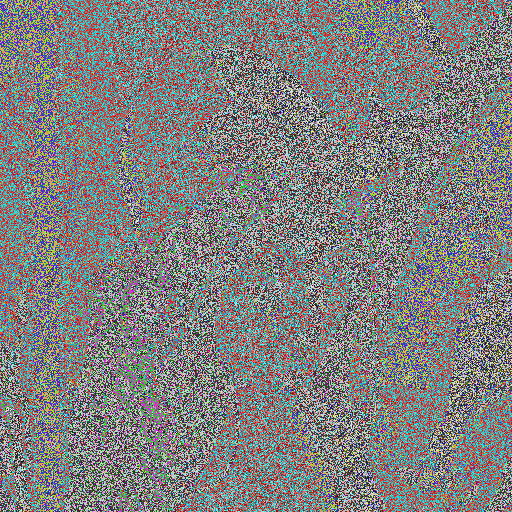


Image after chaotic swapping:


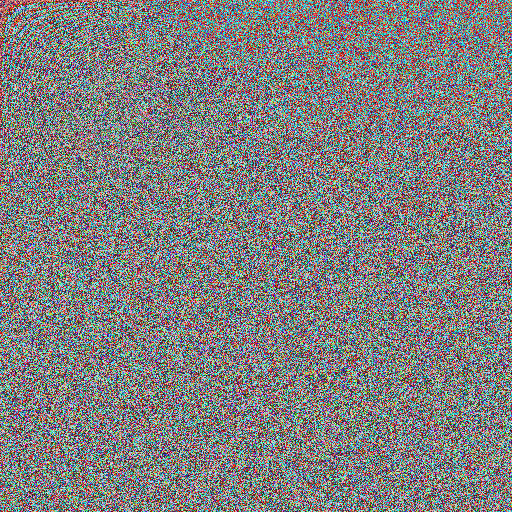


Encrypted image


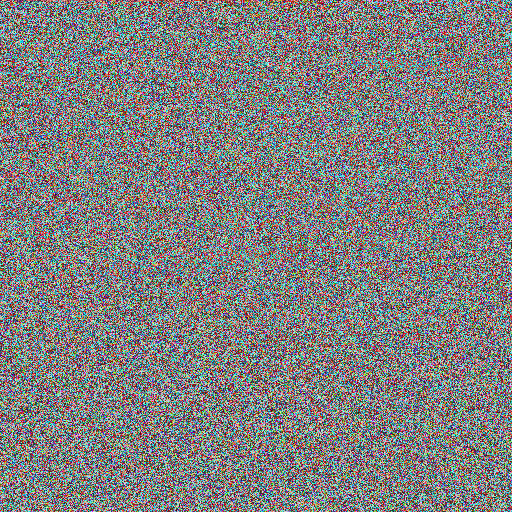


Decrypted image after inverse zigzag:


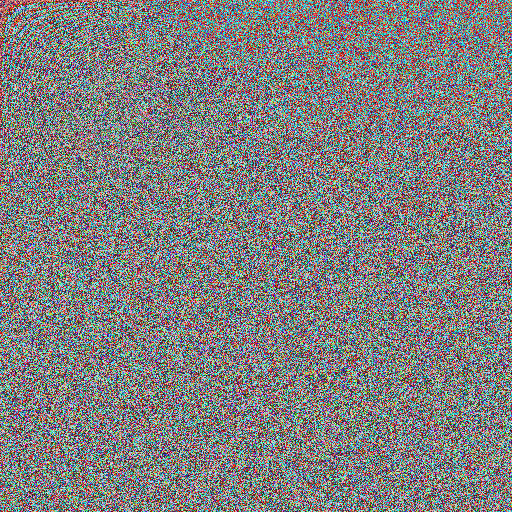


Decrypted image after chaotic deswapping.


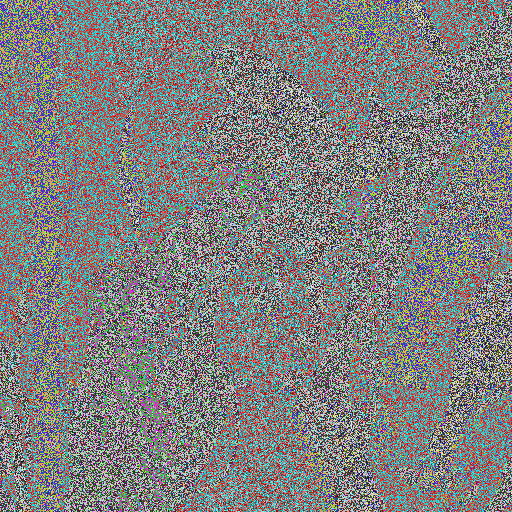


Decrypted image:


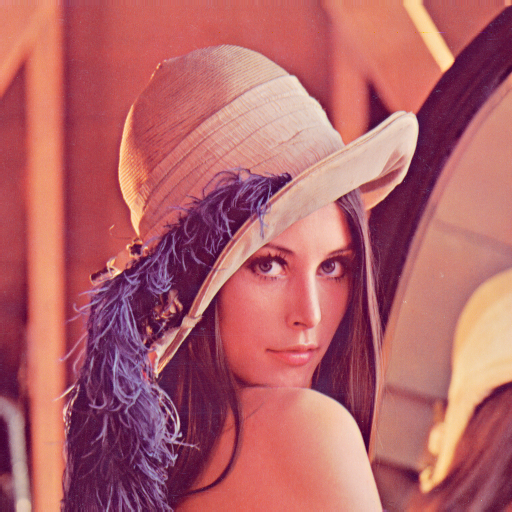

In [ ]:
blue,green,red = cv2.split(test_image)
chaotic_scrambling(blue,green,red, xor_array, x, y)